**PREPROCESSING THE DATA**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl

In [ ]:
df = pd.read_excel("dataset.xlsx")

In [ ]:
df.head()

,name,year,Selling_Price,Kms_driven,Fuel_type,Seller_Type,Transmission,owner,engine
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,1248.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,1498.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,1497.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,1396.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,1298.0


In [ ]:
df.shape

(8128, 9)

In [ ]:
print(df['Fuel_type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['owner'].unique())

['Diesel' 'Petrol' 'LPG' 'CNG']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
[1 2 3 4 0]


In [ ]:
df.isnull().sum()

name               0
year               0
Selling_Price      0
Kms_driven         0
Fuel_type          0
Seller_Type        0
Transmission       0
owner              0
engine           221
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

name             0
year             0
Selling_Price    0
Kms_driven       0
Fuel_type        0
Seller_Type      0
Transmission     0
owner            0
engine           0
dtype: int64

In [ ]:
print(df['Fuel_type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['owner'].unique())

['Diesel' 'Petrol' 'LPG' 'CNG']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
[1 2 3 4 0]


In [ ]:
df.describe()

,year,Selling_Price,Kms_driven,owner,engine
count,7907.000000,7.907000e+03,7.907000e+03,7907.000000,7907.000000
mean,2013.982168,6.497417e+05,6.919256e+04,1.444163,1458.625016
std,3.866650,8.135565e+05,5.678976e+04,0.706131,503.916303
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000
25%,2012.000000,2.700000e+05,3.500000e+04,1.000000,1197.000000
50%,2015.000000,4.500000e+05,6.000000e+04,1.000000,1248.000000
75%,2017.000000,6.900000e+05,9.575000e+04,2.000000,1582.000000
max,2020.000000,1.000000e+07,2.360457e+06,4.000000,3604.000000


In [ ]:
df.columns

Index(['name', 'year', 'Selling_Price', 'Kms_driven', 'Fuel_type',
       'Seller_Type', 'Transmission', 'owner', 'engine'],
      dtype='object')

In [ ]:
final = df[['year', 'Selling_Price', 'Kms_driven','Fuel_type', 'Seller_Type', 'Transmission', 'owner','engine']]

In [ ]:
final.head()

,year,Selling_Price,Kms_driven,Fuel_type,Seller_Type,Transmission,owner,engine
0,2014,450000,145500,Diesel,Individual,Manual,1,1248.0
1,2014,370000,120000,Diesel,Individual,Manual,2,1498.0
2,2006,158000,140000,Petrol,Individual,Manual,3,1497.0
3,2010,225000,127000,Diesel,Individual,Manual,1,1396.0
4,2007,130000,120000,Petrol,Individual,Manual,1,1298.0


In [ ]:
final['Current_Year'] = 2022
final.head()

,year,Selling_Price,Kms_driven,Fuel_type,Seller_Type,Transmission,owner,engine,Current_Year
0,2014,450000,145500,Diesel,Individual,Manual,1,1248.0,2022
1,2014,370000,120000,Diesel,Individual,Manual,2,1498.0,2022
2,2006,158000,140000,Petrol,Individual,Manual,3,1497.0,2022
3,2010,225000,127000,Diesel,Individual,Manual,1,1396.0,2022
4,2007,130000,120000,Petrol,Individual,Manual,1,1298.0,2022


In [ ]:
final['Years_old'] = final['Current_Year']-final['year']
final.head()

,year,Selling_Price,Kms_driven,Fuel_type,Seller_Type,Transmission,owner,engine,Current_Year,Years_old
0,2014,450000,145500,Diesel,Individual,Manual,1,1248.0,2022,8
1,2014,370000,120000,Diesel,Individual,Manual,2,1498.0,2022,8
2,2006,158000,140000,Petrol,Individual,Manual,3,1497.0,2022,16
3,2010,225000,127000,Diesel,Individual,Manual,1,1396.0,2022,12
4,2007,130000,120000,Petrol,Individual,Manual,1,1298.0,2022,15


In [ ]:
final.drop(['year'],axis=1,inplace=True)

In [ ]:
final.drop(['Current_Year'],axis=1,inplace=True)

In [ ]:
final.head()

,Selling_Price,Kms_driven,Fuel_type,Seller_Type,Transmission,owner,engine,Years_old
0,450000,145500,Diesel,Individual,Manual,1,1248.0,8
1,370000,120000,Diesel,Individual,Manual,2,1498.0,8
2,158000,140000,Petrol,Individual,Manual,3,1497.0,16
3,225000,127000,Diesel,Individual,Manual,1,1396.0,12
4,130000,120000,Petrol,Individual,Manual,1,1298.0,15


In [ ]:
final = pd.get_dummies(final,drop_first=True)

In [ ]:
final.head()

,Selling_Price,Kms_driven,owner,engine,Years_old,Fuel_type_Diesel,Fuel_type_LPG,Fuel_type_Petrol,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Manual
0,450000,145500,1,1248.0,8,1,0,0,1,0,1
1,370000,120000,2,1498.0,8,1,0,0,1,0,1
2,158000,140000,3,1497.0,16,0,0,1,1,0,1
3,225000,127000,1,1396.0,12,1,0,0,1,0,1
4,130000,120000,1,1298.0,15,0,0,1,1,0,1


In [ ]:
final.shape

(7907, 11)

In [ ]:
final.corr()

,Selling_Price,Kms_driven,owner,engine,Years_old,Fuel_type_Diesel,Fuel_type_LPG,Fuel_type_Petrol,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Manual
Selling_Price,1.000000,-0.222196,-0.238675,0.455734,-0.412268,0.204906,-0.035971,-0.194979,-0.386174,0.032794,-0.590279
Kms_driven,-0.222196,1.000000,0.287396,0.205914,0.428434,0.271562,0.023090,-0.274502,0.202875,-0.083191,0.201207
owner,-0.238675,0.287396,1.000000,0.005067,0.508767,0.021771,0.025509,-0.025392,0.223481,-0.075600,0.151175
engine,0.455734,0.205914,0.005067,1.000000,-0.018848,0.507471,-0.056664,-0.490962,-0.132274,0.038715,-0.283237
Years_old,-0.412268,0.428434,0.508767,-0.018848,1.000000,-0.038001,0.059806,0.033911,0.243731,-0.100382,0.248972
Fuel_type_Diesel,0.204906,0.271562,0.021771,0.507471,-0.038001,1.000000,-0.072785,-0.977773,0.003505,-0.140728,0.025523
Fuel_type_LPG,-0.035971,0.023090,0.025509,-0.056664,0.059806,-0.072785,1.000000,-0.059728,0.025087,-0.011696,0.025964
Fuel_type_Petrol,-0.194979,-0.274502,-0.025392,-0.490962,0.033911,-0.977773,-0.059728,1.000000,-0.012964,0.144968,-0.034299
Seller_Type_Individual,-0.386174,0.202875,0.223481,-0.132274,0.243731,0.003505,0.025087,-0.012964,1.000000,-0.387772,0.378712
Seller_Type_Trustmark Dealer,0.032794,-0.083191,-0.075600,0.038715,-0.100382,-0.140728,-0.011696,0.144968,-0.387772,1.000000,-0.149317


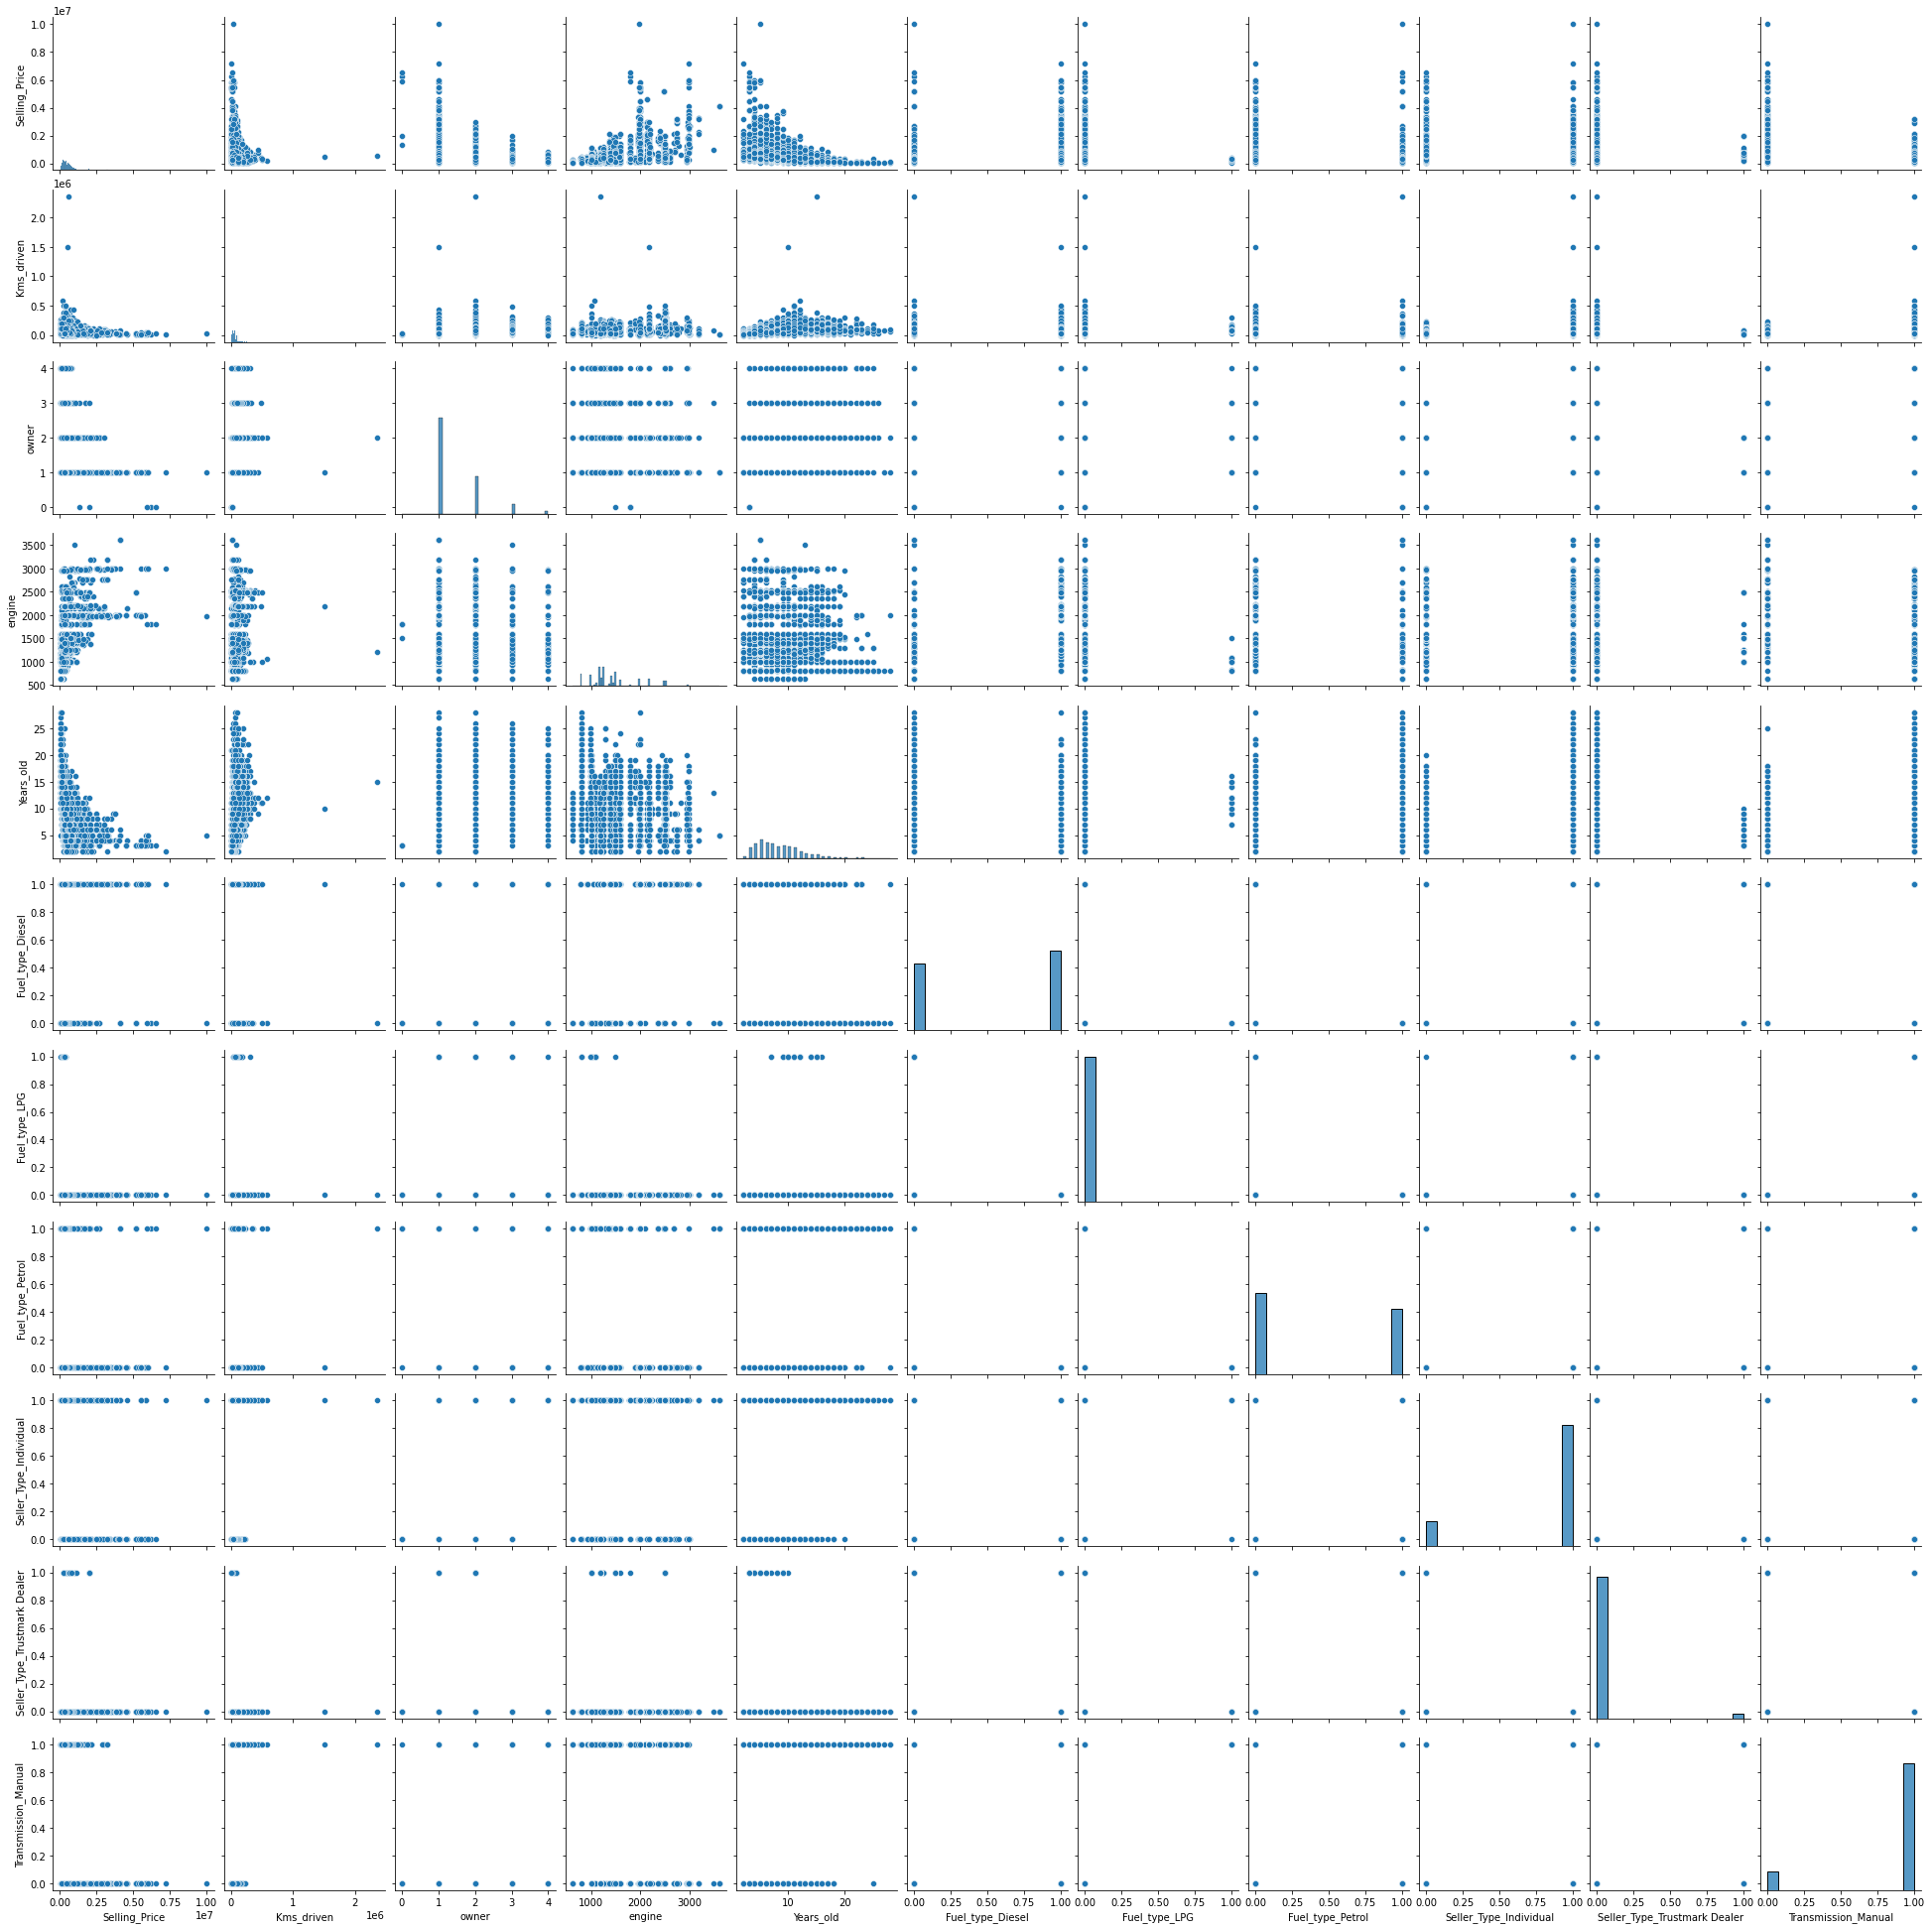

In [ ]:
sns.pairplot(final)

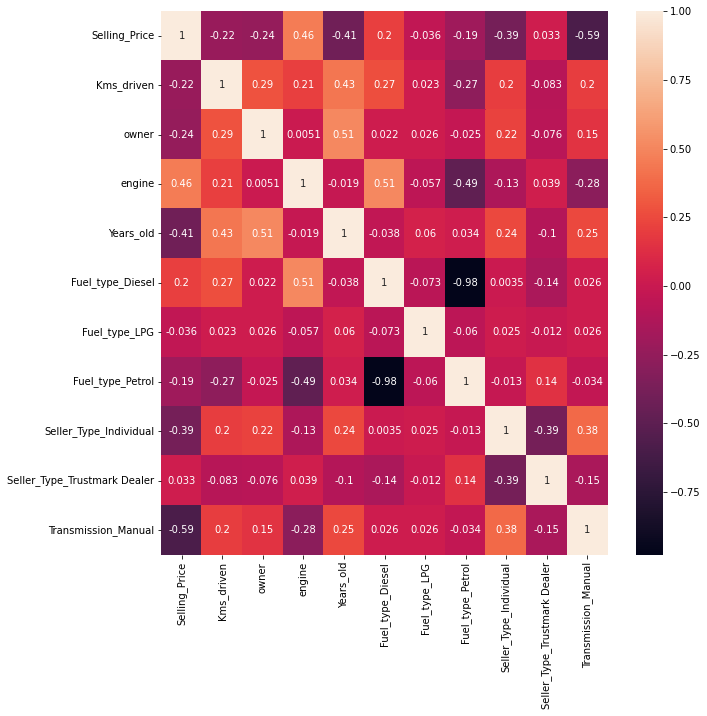

In [ ]:
corr = final.corr()
corr_features = corr.index
plt.figure(figsize=(10,10))
g = sns.heatmap(final[corr_features].corr(), annot=True)

In [ ]:
x = final.corr().sort_values(by="Selling_Price", ascending=False)
print(x['Selling_Price'])

Selling_Price                   1.000000
engine                          0.455734
Fuel_type_Diesel                0.204906
Seller_Type_Trustmark Dealer    0.032794
Fuel_type_LPG                  -0.035971
Fuel_type_Petrol               -0.194979
Kms_driven                     -0.222196
owner                          -0.238675
Seller_Type_Individual         -0.386174
Years_old                      -0.412268
Transmission_Manual            -0.590279
Name: Selling_Price, dtype: float64


In [ ]:
final.tail()

,Selling_Price,Kms_driven,owner,engine,Years_old,Fuel_type_Diesel,Fuel_type_LPG,Fuel_type_Petrol,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Manual
8123,320000,110000,1,1197.0,9,0,0,1,1,0,1
8124,135000,119000,4,1493.0,15,1,0,0,1,0,1
8125,382000,120000,1,1248.0,13,1,0,0,1,0,1
8126,290000,25000,1,1396.0,9,1,0,0,1,0,1
8127,290000,25000,1,1396.0,9,1,0,0,1,0,1


In [ ]:
final.columns

Index(['Selling_Price', 'Kms_driven', 'owner', 'engine', 'Years_old',
       'Fuel_type_Diesel', 'Fuel_type_LPG', 'Fuel_type_Petrol',
       'Seller_Type_Individual', 'Seller_Type_Trustmark Dealer',
       'Transmission_Manual'],
      dtype='object')

In [ ]:
X = final.iloc[:,1:]
y = final.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X_train,y_train)

ExtraTreesRegressor()